# PyTorch 기초


## 1. PyTorch 소개

PyTorch는 딥러닝(Deep Learning)을 위한 Python 오픈소스 라이브러리로, Meta에서 개발되었습니다. PyTorch는 유연하고 효율적이며 사용이 쉬운 설계로 많은 연구자와 개발자들이 애용하고 있습니다.

### 주요 특징

- 동적 계산 그래프

    PyTorch는 동적 계산 그래프를 지원합니다. 이를 통해 실행 중에도 그래프 구조를 자유롭게 변경할 수 있어, 복잡한 모델 아키텍처를 쉽게 구현할 수 있습니다. 이 유연성 덕분에 실험과 연구 환경에서 매우 강력한 도구로 사용됩니다.

- GPU 가속

    GPU를 통해 연산 속도를 대폭 향상시킬 수 있습니다. 특히, 대규모 데이터셋을 다루거나 복잡한 모델을 훈련할 때 GPU 활용은 필수적입니다.

- 간단하고 직관적인 인터페이스 제공

    Python 특유의 직관성과 디버깅 용이성을 살려, 간단하고 유연한 코드 작성을 지원합니다. 사용자 친화적인 API 덕분에 연구부터 상용 개발까지 폭넓게 사용됩니다.

- 활발한 커뮤니티

    PyTorch는 HuggingFace와 같은 커뮤니티에서 활발하게 지원되고 있습니다. 방대한 라이브러리와 도구들이 공유되며, 문제 해결에 대한 지원도 빠르고 다양합니다.

그렇다면, 이제 PyTorch를 import하고 버전을 확인해보겠습니다.

In [ ]:
import torch

# PyTorch 버전 확인
print(f"PyTorch Version: {torch.__version__}")

PyTorch Version: 2.4.1+cu121


그리고, GPU 가속 활용 여부에 대해서도 확인해보도록 하겠습니다.

In [ ]:
!nvidia-smi

Tue Oct 22 15:54:00 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
# CUDA 사용 가능 여부 확인
print(f"CUDA available: {torch.cuda.is_available()}")

# MPS 사용 가능 여부 확인 (Mac GPU)
if torch.backends.mps.is_available():
    print("MPS available: True")
else:
    print("MPS available: False")

CUDA available: True
MPS available: False


만약 CUDA / GPU를 사용해야 하는 상황이라면 런타임에서 런타임 유형을 변경해주시면 됩니다.

Google Colab에서 GPU를 사용하려면 다음 단계를 따라주세요:
1. 메뉴에서 "런타임" > "런타임 유형 변경"을 선택합니다.
2. 하드웨어 가속기 옵션에서 "GPU"를 선택한 후 "저장"을 클릭합니다.

Mac 사용자의 경우, MPS 지원이 활성화된 경우 자동으로 Mac GPU를 사용할 수 있습니다.

## 2. PyTorch 기초 텐서

PyTorch는 딥러닝 프레임워크 중 하나로, 데이터를 처리하는 데 텐서(Tensor)라는 자료 구조를 사용합니다.

텐서는 NumPy `ndarray` 과 비슷하지만, GPU를 사용하여 빠른 계산을 할 수 있다는 차이점이 있습니다.

PyTorch에서 텐서는 데이터를 표현하는 기본 도구이며, 수학적 연산, 딥러닝 모델의 가중치 등을 계산할 때 사용됩니다.

### 텐서의 차원 이해하기

텐서는 차원(Rank)에 따라 여러 가지로 나뉩니다.

차원에 따라 다음과 같은 형태로 구분됩니다.

1. 스칼라 (Scalar): 하나의 숫자입니다. 차원이 없는 0차원 텐서입니다.

2. 벡터 (Vector): 숫자가 나열된 리스트처럼 생긴 1차원 텐서입니다.

3. 행렬 (Matrix): 숫자들이 2차원 평면에 배치된 표처럼 생긴 2차원 텐서입니다.

4. 배열 (Array): 여러 개의 행렬이 쌓여 있는 3차원 이상의 텐서입니다. 이미지를 표현할 때 주로 사용됩니다.

In [ ]:
import torch
import matplotlib.pyplot as plt

# 1. 스칼라 (0차원 텐서)
scalar_tensor = torch.tensor(5)

# 2. 벡터 (1차원 텐서)
vector_tensor = torch.tensor([1, 2, 3])

# 3. 행렬 (2차원 텐서)
matrix_tensor = torch.tensor([[1, 2, 3], [4, 5, 6]])

# 4. 배열 (3차원 텐서) - RGB 이미지를 표현할 때 사용
array_tensor = torch.tensor([[[1, 2], [3, 4]], [[5, 6], [7, 8]], [[9, 10], [11, 12]]])

# 텐서 출력
print("Scalar:", scalar_tensor)
print("Vector:", vector_tensor)
print("Matrix:\n", matrix_tensor)
print("Array:\n", array_tensor)


Scalar: tensor(5)
Vector: tensor([1, 2, 3])
Matrix:
 tensor([[1, 2, 3],
        [4, 5, 6]])
Array:
 tensor([[[ 1,  2],
         [ 3,  4]],

        [[ 5,  6],
         [ 7,  8]],

        [[ 9, 10],
         [11, 12]]])


<img src="https://res.cloudinary.com/practicaldev/image/fetch/s--8pw60d5S--/c_limit%2Cf_auto%2Cfl_progressive%2Cq_auto%2Cw_800/https://raw.githubusercontent.com/adhiraiyan/DeepLearningWithTF2.0/master/notebooks/figures/fig0201a.png">

### 2.1 텐서 생성

PyTorch에서 텐서를 생성하는 방법은 NumPy에서 배열을 생성하는 방법과 매우 유사합니다.

텐서는 PyTorch의 기본 데이터 구조로, 숫자, 벡터, 행렬, 또는 더 높은 차원의 배열을 나타냅니다.

텐서를 생성하는 가장 일반적인 방법은 torch.tensor() 함수를 사용하는 것입니다.

예를 들어, 다음 코드는 1차원 텐서를 생성하는 방법을 보여줍니다.

In [ ]:
# 1차원 텐서 생성
x = torch.tensor([1, 2, 3])
print(f"1D Tensor: {x}")

1D Tensor: tensor([1, 2, 3])


- torch.tensor(): 주어진 데이터로 텐서를 생성합니다.

### 2.2 텐서 속성

텐서는 여러 속성을 가지고 있으며, 그 중 가장 중요한 속성은 다음과 같습니다.

1. 형태(Shape)

    텐서의 차원과 크기를 나타냅니다. 이는 텐서가 몇 차원으로 이루어졌는지를 알려줍니다.

2. 자료형(dtype)

    텐서에 저장된 데이터의 유형을 의미합니다. 예를 들어, 정수, 실수 등이 있습니다.

3. 장치(device)

    텐서가 CPU에서 연산되는지, GPU에서 연산되는지를 나타냅니다. PyTorch는 GPU 가속을 지원하므로, GPU를 사용하고 싶을 때는 장치를 cuda로 설정할 수 있습니다.

In [ ]:
# 텐서의 데이터 타입과 형태 확인
print(f"1D Tensor's data type: {x.dtype}")
print(f"1D Tensor's shape: {x.shape}")

1D Tensor's data type: torch.int64
1D Tensor's shape: torch.Size([3])


- dtype: 텐서의 데이터 타입을 나타냅니다 (예: int64, float32).
- shape: 텐서의 차원과 크기를 확인할 수 있습니다.

In [ ]:
# 만약 텐서 안에 하나라도 실수가 포함되면?
y = torch.tensor([1, 2, 3.14, 4])
print(y)
print(f"y Tensor's data type: {y.dtype}")  # dtype이 float로 처리됨
print(f"y Tensor's shape: {y.shape}")

tensor([1.0000, 2.0000, 3.1400, 4.0000])
y Tensor's data type: torch.float32
y Tensor's shape: torch.Size([4])


In [ ]:
# 2차원 텐서 생성
z = torch.tensor([[1, 2], [3, 4]])
print(f"\n2D Tensor:\n{z}")
print(f"2D Tensor's data type: {z.dtype}")
print(f"2D Tensor's shape: {z.shape}")
print(f"2D Tensor's dimension: {z.ndim}")  # 텐서의 차원 수
print(f"2D Tensor's total number of elements: {z.numel()}")  # 총 원소 개수
print(f"2D Tensor's device: {z.device}")  # 텐서가 어느 device에서 연산 중인지 확인


2D Tensor:
tensor([[1, 2],
        [3, 4]])
2D Tensor's data type: torch.int64
2D Tensor's shape: torch.Size([2, 2])
2D Tensor's dimension: 2
2D Tensor's total number of elements: 4
2D Tensor's device: cpu


- numel(): 텐서의 총 원소 개수를 반환합니다.
- device: 텐서가 CPU에서 연산 중인지, GPU에서 연산 중인지 알려줍니다.

In [ ]:
# 2차원 텐서에서 주의할 사항!
a = torch.tensor([[1, 2, 3], [4, 5]])  # 첫 번째 행은 3개, 두 번째 행은 2개
print(a)

ValueError: expected sequence of length 3 at dim 1 (got 2)

1. 오류 발생 원인:

    - PyTorch에서 2차원 텐서를 생성할 때는 모든 행의 길이가 같아야 합니다. 즉, 텐서가 행렬 형태를 유지하려면 각 행에 동일한 개수의 요소가 있어야 합니다.

    - 하지만, 위의 코드에서는 torch.tensor([[1, 2, 3], [4, 5]])와 같이 첫 번째 행은 3개의 요소를 가지고, 두 번째 행은 2개의 요소를 가지도록 텐서를 생성하려고 했습니다. 이처럼 행의 길이가 다르기 때문에 PyTorch는 텐서를 생성할 수 없고, ValueError를 발생시킵니다.

2. 오류 메시지 해석:

    오류 메시지 ValueError: expected sequence of length 3 at dim 1 (got 2)는 다음과 같은 의미를 갖습니다.

    - expected sequence of length 3 at dim 1: 1차원(dim 1)에서 길이가 3인 시퀀스를 기대했습니다. 즉, 각 행의 길이가 3이어야 합니다.
    
    - (got 2): 하지만 길이가 2인 시퀀스를 받았습니다.

    - 오류를 해결하려면 모든 행의 길이를 동일하게 맞추거나, 불규칙한 길이의 데이터를 다루기 위해서는 리스트 대신 다른 방법 (예: 패딩, 가변 길이 텐서)을 고려해야 합니다.

### 2.3 텐서 차원 변환

텐서의 차원 변환은 딥러닝과 머신러닝에서 자주 사용되는 기능 중 하나로, 모델의 입출력 형태를 맞추거나 특정 연산을 하기 전에 데이터를 적절하게 변환하는 데 유용합니다.

PyTorch에서는 reshape() 함수를 사용하여 텐서의 차원을 쉽게 변환할 수 있습니다. 이 함수는 NumPy의 reshape() 함수와 동일한 방식으로 동작합니다.



In [ ]:
# 랜덤 텐서 생성 (기본적으로 1차원 텐서로 생성)
tensor = torch.rand(2, 3)
print("Original Tensor:")
print(tensor)
print("Original Tensor Shape:", tensor.shape)

Original Tensor:
tensor([[0.6715, 0.7615, 0.5328],
        [0.2472, 0.8774, 0.6597]])
Original Tensor Shape: torch.Size([2, 3])


- torch.rand(): 0과 1 사이의 무작위 숫자를 균등 분포로 생성하는 함수 (0 이상 1 미만의 범위를 갖음.)

- torch.rand(2, 3): 무작위 값으로 채워진 2x3 텐서를 생성합니다.

In [ ]:
# 텐서의 차원 변환 (2x3 텐서를 3x2 텐서로 변환)
tensor_reshaped = tensor.reshape(3, 2)
print("\nReshaped Tensor (3x2):")
print(tensor_reshaped)
print("Reshaped Tensor Shape:", tensor_reshaped.shape)


Reshaped Tensor (3x2):
tensor([[0.6715, 0.7615],
        [0.5328, 0.2472],
        [0.8774, 0.6597]])
Reshaped Tensor Shape: torch.Size([3, 2])


- reshape(3, 2): 2x3 텐서를 3x2 텐서로 변환합니다. 이때 원소의 개수는 그대로 유지해야 합니다.

In [ ]:
# 2차원에서 1차원으로 변환
tensor_flatten = tensor.reshape(-1)
print("\nFlattened Tensor:")
print(tensor_flatten)
print("Flattened Tensor Shape:", tensor_flatten.shape)


Flattened Tensor:
tensor([0.6715, 0.7615, 0.5328, 0.2472, 0.8774, 0.6597])
Flattened Tensor Shape: torch.Size([6])


- reshape(-1): 텐서를 1차원으로 변환할 때 사용됩니다. `-1`은 자동으로 차원을 계산하여 텐서를 평탄화(flatten)합니다.

### 2.4 자료형 설정

텐서의 자료형 설정은 딥러닝 모델을 구현할 때 중요한 요소 중 하나입니다.

텐서에 저장된 데이터의 형식은 모델의 성능과 메모리 사용량에 영향을 줄 수 있기 때문에 적절한 자료형을 설정하는 것이 매우 중요합니다.

PyTorch에서 텐서의 자료형을 설정하는 방식은 NumPy와 유사하지만, PyTorch는 torch.* 형태로 자료형을 명시하는 것이 일반적입니다.

In [ ]:
# 32비트 부동 소수점(float32)으로 텐서 생성
tensor = torch.rand((3, 3), dtype=torch.float)
print("32-bit float tensor:")
print(tensor)
print("Data type:", tensor.dtype)

32-bit float tensor:
tensor([[0.8140, 0.5680, 0.1470],
        [0.7944, 0.2709, 0.7248],
        [0.9671, 0.6012, 0.1801]])
Data type: torch.float32


- torch.float (float32): 32비트 부동 소수점 자료형입니다. 딥러닝 모델에서 많이 사용되며, 메모리 사용량이 상대적으로 적고 학습 성능도 적당합니다.

In [ ]:
# 64비트 부동 소수점(float64)으로 텐서 생성
tensor = torch.rand((3, 3), dtype=torch.float64)
print("\n64-bit float tensor:")
print(tensor)
print("Data type:", tensor.dtype)


64-bit float tensor:
tensor([[0.0554, 0.9650, 0.2862],
        [0.7361, 0.6032, 0.0057],
        [0.3545, 0.9099, 0.0553]], dtype=torch.float64)
Data type: torch.float64


- torch.float64: 64비트 부동 소수점 자료형으로, 더 큰 범위의 숫자를 표현할 수 있습니다. 하지만 더 많은 메모리를 사용하며, 일반적으로 32비트보다 연산 속도가 느릴 수 있습니다.

속도와 자원 사용: 부동 소수점 자료형이 커질수록(예: float64), 연산의 정확도는 높아질 수 있지만, 연산 속도는 느려질 수 있으며 더 많은 자원이 필요합니다.

따라서, 딥러닝 모델을 구축할 때는 대부분 torch.float과 같은 32비트 부동 소수점을 사용하는 것이 일반적입니다. 데이터의 크기와 요구되는 정확도에 따라 적절한 자료형을 선택하는 것이 중요합니다.

In [ ]:
# 텐서의 자료형 변환
tensor = torch.rand((3, 3))
print("Original tensor data type:", tensor.dtype)

# float32에서 float64로 변환
tensor = tensor.to(torch.float64)
print("Converted tensor data type:", tensor.dtype)

Original tensor data type: torch.float32
Converted tensor data type: torch.float64


이와 같이 to() 메서드를 사용하여 텐서의 자료형을 변환할 수도 있습니다.

### 2.5 장치 설정

장치 설정은 PyTorch에서 GPU를 활용하여 모델을 학습하는 데 필수적인 설정입니다.

장치 설정을 제대로 하지 않으면 GPU를 활용하지 못하고 CPU에서 연산을 진행하게 되어 학습 속도가 크게 느려집니다.

따라서 모델 학습을 하기 전에 장치 설정을 반드시 확인해야 합니다.

#### 1. 장치 설정 기본 예제

In [ ]:
# CUDA 또는 CPU 장치 설정
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# CPU와 GPU에 각각 텐서 생성
cpu_tensor = torch.FloatTensor([1, 2, 3])
gpu_tensor = torch.cuda.FloatTensor([1, 2, 3]) if torch.cuda.is_available() else cpu_tensor

# 설정한 장치에 텐서 생성
tensor = torch.tensor([1, 2, 3], device=device)

# 출력
print(f"Device in use: {device}")
print(f"CPU Tensor: {cpu_tensor}")
print(f"GPU Tensor: {gpu_tensor}")
print(f"Tensor on {device}: {tensor}")

<ipython-input-16-98949356e539>:6: UserWarning: The torch.cuda.*DtypeTensor constructors are no longer recommended. It's best to use methods such as torch.tensor(data, dtype=*, device='cuda') to create tensors. (Triggered internally at ../torch/csrc/tensor/python_tensor.cpp:78.)
  gpu_tensor = torch.cuda.FloatTensor([1, 2, 3]) if torch.cuda.is_available() else cpu_tensor


Device in use: cuda
CPU Tensor: tensor([1., 2., 3.])
GPU Tensor: tensor([1., 2., 3.], device='cuda:0')
Tensor on cuda: tensor([1, 2, 3], device='cuda:0')


장치 확인

- torch.cuda.is_available()를 사용하여 CUDA 사용 가능 여부를 확인하고, 가능하다면 'cuda'를, 그렇지 않으면 'cpu'를 선택합니다.

텐서 생성

- device 매개변수를 통해 텐서를 원하는 장치에 할당합니다. 장치 간의 통일된 설정을 통해 모델 코드 전체에서 통일된 장치를 사용할 수 있습니다.

#### 2. 애플 실리콘 (M1/M2/M3)에서 MPS 설정

애플 실리콘을 사용하는 경우 CUDA 대신 **MPS (Metal Performance Shaders)**를 이용하여 GPU 가속을 할 수 있습니다. 이 경우, MPS 가속을 확인하고 장치를 설정할 수 있습니다.

In [ ]:
# MPS 또는 CPU 장치 설정 (Apple Silicon)
device = "mps" if torch.backends.mps.is_available() and torch.backends.mps.is_built() else "cpu"

# 설정한 장치에 텐서 생성
tensor = torch.tensor([1, 2, 3], device=device)

# 출력
print(f"Device in use: {device}")
print(f"Tensor on {device}: {tensor}")


Device in use: cpu
Tensor on cpu: tensor([1, 2, 3])


- MPS 사용 확인: torch.backends.mps.is_available()와 torch.backends.mps.is_built()를 사용하여 MPS 사용 가능 여부를 확인합니다.
- 장치 설정: MPS가 가능하다면 'mps'를, 그렇지 않으면 'cpu'를 사용합니다.

### 2.6 장치 변환

PyTorch에서는 텐서를 CPU와 GPU 간에 쉽게 변환할 수 있습니다. 다만, CPU에서 사용하는 텐서와 GPU에서 사용하는 텐서는 직접적인 연산이 불가능합니다. 따라서, 연산을 수행하기 전에 필요한 장치로 텐서를 변환해야 합니다.

또한, NumPy 배열을 PyTorch 텐서로 변환하거나, PyTorch 텐서를 다시 NumPy 배열로 변환하는 것도 가능합니다. 이 기능을 통해 NumPy와 PyTorch 간에 데이터를 쉽게 주고받을 수 있습니다.

장치 변환 예제

1. CPU 텐서를 GPU로 변환 (cuda(), to("cuda"))
2. GPU 텐서를 CPU로 변환 (cpu())
3. NumPy 배열을 텐서로 변환, 텐서를 NumPy 배열로 변환

#### 장치 간 상호 변환

- cuda(): CPU 장치에 있는 텐서를 GPU로 변환합니다.
- cpu(): GPU 장치에 있는 텐서를 다시 CPU로 변환합니다.
- to() 메서드를 사용하여 다양한 장치 간에 텐서를 변환할 수 있습니다. 특히, 애플 실리콘이 탑재된 Mac에서는 cuda() 대신 to("mps")를 사용하여 GPU(MPS)로 변환할 수 있습니다.

In [ ]:
# 1. CPU 텐서를 GPU로 변환
cpu_tensor = torch.FloatTensor([1, 2, 3])
print("CPU Tensor:", cpu_tensor)

if torch.cuda.is_available():
    gpu_tensor = cpu_tensor.cuda()  # CPU -> GPU 변환
    print("GPU Tensor:", gpu_tensor)

    gpu_to_cpu_tensor = gpu_tensor.cpu()  # 다시 GPU -> CPU 변환
    print("GPU to CPU Tensor:", gpu_to_cpu_tensor)

CPU Tensor: tensor([1., 2., 3.])
GPU Tensor: tensor([1., 2., 3.], device='cuda:0')
GPU to CPU Tensor: tensor([1., 2., 3.])


- CPU 텐서를 GPU로 변환

    - cpu_tensor.cuda() 또는 cpu_tensor.to("cuda")를 사용하여 CPU에서 GPU로 텐서를 변환할 수 있습니다. 이 기능은 CUDA가 활성화된 경우에만 가능합니다.

- GPU 텐서를 CPU로 변환:

    - gpu_tensor.cpu()를 사용하여 GPU에서 CPU로 텐서를 다시 변환할 수 있습니다.

In [ ]:
# 2. to() 메서드를 사용한 장치 변환 (Apple Silicon M1/M2/M3의 경우 MPS로 변환)
if torch.backends.mps.is_available():
    mps_tensor = cpu_tensor.to("mps")  # CPU -> MPS 변환 (Apple Silicon)
    print("MPS Tensor (Apple Silicon):", mps_tensor)
    mps_to_cpu_tensor = mps_tensor.cpu()  # MPS -> CPU 변환
    print("MPS to CPU Tensor:", mps_to_cpu_tensor)

- Apple Silicon(M1/M2/M3)에서 MPS 장치 사용

    - cpu_tensor.to("mps")를 사용하여 Apple Silicon에서는 MPS 장치로 텐서를 변환할 수 있습니다.

In [ ]:
# 3. NumPy 배열과 PyTorch 텐서 간 변환
import numpy as np

numpy_array = np.array([1, 2, 3])  # NumPy 배열
tensor_from_numpy = torch.from_numpy(numpy_array)  # NumPy -> PyTorch 텐서
print("\nNumPy to Tensor:", tensor_from_numpy)



NumPy to Tensor: tensor([1, 2, 3])


- torch.from_numpy()를 사용하여 NumPy 배열을 PyTorch 텐서로 변환할 수 있습니다.


In [ ]:
# 텐서를 NumPy 배열로 변환
tensor = torch.tensor([4, 5, 6])
numpy_from_tensor = tensor.numpy()  # PyTorch 텐서 -> NumPy 배열
print("Tensor to NumPy:", numpy_from_tensor)

Tensor to NumPy: [4 5 6]


- tensor.numpy()를 사용하여 PyTorch 텐서를 NumPy 배열로 변환할 수 있습니다. 단, GPU 텐서는 바로 변환할 수 없으며, 먼저 CPU로 변환한 후에 변환해야 합니다.

### 2.7 텐서 생성 함수

PyTorch는 다양한 텐서 생성 함수를 제공합니다.

| 함수 | 설명 |
|---|---|
| `torch.zeros()` |  모든 요소를 0으로 채운 텐서를 생성합니다. |
| `torch.ones()` | 모든 요소를 1로 채운 텐서를 생성합니다. |
| `torch.arange()` |  지정된 범위 내에서 순차적으로 증가하는 값을 가진 텐서를 생성합니다. |
| `torch.linspace()` | 시작값과 끝값 사이를 지정된 개수로 균등하게 나눈 값들로 텐서를 생성합니다. |
| `torch.rand()` | 0과 1 사이의 무작위 숫자를 균등 분포로 생성하여 텐서를 채웁니다. |
| `torch.randn()` | 표준 정규 분포 (평균 0, 표준편차 1)에서 난수를 생성하여 텐서를 채웁니다. |


In [ ]:
# 텐서 생성 함수들

# 0으로 채워진 1차원 텐서 생성 (크기: 5)
zeros_tensor = torch.zeros(5)
print("torch.zeros(5):\n", zeros_tensor)
print("설명: 0으로 채워진 크기가 5인 1차원 텐서를 생성합니다.\n")

# 1로 채워진 2차원 텐서 생성 (크기: 3x3)
ones_tensor = torch.ones(3, 3)
print("torch.ones(3, 3):\n", ones_tensor)
print("설명: 1로 채워진 크기가 3x3인 2차원 텐서를 생성합니다.\n")

# 0부터 10까지 2씩 증가하는 1차원 텐서 생성
arange_tensor = torch.arange(0, 10, 2)
print("torch.arange(0, 10, 2):\n", arange_tensor)
print("설명: 0부터 10까지 (10은 포함하지 않음) 2씩 증가하는 값을 가진 1차원 텐서를 생성합니다.\n")

# 0부터 1까지 0.1씩 증가하는 1차원 텐서 생성 (소수점 가능)
arange_float_tensor = torch.arange(0, 1, 0.1)
print("torch.arange(0, 1, 0.1):\n", arange_float_tensor)
print("설명: 0부터 1까지 (1은 포함하지 않음) 0.1씩 증가하는 값을 가진 1차원 텐서를 생성합니다.\n")

# 0부터 1까지 균등하게 5개의 값을 가진 1차원 텐서 생성
linspace_tensor = torch.linspace(0, 1, 5)
print("torch.linspace(0, 1, 5):\n", linspace_tensor)
print("설명: 0부터 1까지 (1을 포함) 균등하게 5개의 값을 가진 1차원 텐서를 생성합니다.\n")

# 0과 1 사이의 균등 분포(0과 1 사이의 무작위 숫자를 균등 분포로 생성)에서 난수로 채워진 2차원 텐서 생성 (크기: 3x3)
rand_tensor = torch.rand(3, 3)
print("torch.rand(3, 3):\n", rand_tensor)
print("설명: 0과 1 사이의 균등 분포(0과 1 사이의 무작위 숫자를 균등 분포로 생성)에서 난수를 생성하여 크기가 3x3인 2차원 텐서를 생성합니다.\n")

# 표준 정규 분포에서 난수로 채워진 2차원 텐서 생성 (크기: 3x3)
randn_tensor = torch.randn(3, 3)
print("torch.randn(3, 3):\n", randn_tensor)
print("설명: 표준 정규 분포 (평균 0, 표준편차 1)에서 난수를 생성하여 크기가 3x3인 2차원 텐서를 생성합니다.\n")

torch.zeros(5):
 tensor([0., 0., 0., 0., 0.])
설명: 0으로 채워진 크기가 5인 1차원 텐서를 생성합니다.

torch.ones(3, 3):
 tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])
설명: 1로 채워진 크기가 3x3인 2차원 텐서를 생성합니다.

torch.arange(0, 10, 2):
 tensor([0, 2, 4, 6, 8])
설명: 0부터 10까지 (10은 포함하지 않음) 2씩 증가하는 값을 가진 1차원 텐서를 생성합니다.

torch.arange(0, 1, 0.1):
 tensor([0.0000, 0.1000, 0.2000, 0.3000, 0.4000, 0.5000, 0.6000, 0.7000, 0.8000,
        0.9000])
설명: 0부터 1까지 (1은 포함하지 않음) 0.1씩 증가하는 값을 가진 1차원 텐서를 생성합니다.

torch.linspace(0, 1, 5):
 tensor([0.0000, 0.2500, 0.5000, 0.7500, 1.0000])
설명: 0부터 1까지 (1을 포함) 균등하게 5개의 값을 가진 1차원 텐서를 생성합니다.

torch.rand(3, 3):
 tensor([[0.3942, 0.8994, 0.4867],
        [0.2668, 0.6442, 0.8004],
        [0.3993, 0.2800, 0.5691]])
설명: 0과 1 사이의 균등 분포(0과 1 사이의 무작위 숫자를 균등 분포로 생성)에서 난수를 생성하여 크기가 3x3인 2차원 텐서를 생성합니다.

torch.randn(3, 3):
 tensor([[ 0.8162, -0.8794,  0.8699],
        [ 0.2118, -0.6875,  0.9797],
        [-0.7988,  0.7458, -0.4872]])
설명: 표준 정규 분포 (평균 0, 표준편차 1)에서 난수를 생성하여 크기가 3x3인 

## 3. PyTorch의 연산

PyTorch는 다양한 수학 함수와 유틸리티 함수를 제공하여, 텐서 간의 기본 연산부터 복잡한 행렬 연산까지 쉽게 수행할 수 있습니다.

여기서는 기본적인 산술 연산, 행렬 곱셈, 통계 함수 등을 다뤄보도록 하겠습니다.

### 3.1 기본적인 산술 연산

- 요소별 연산

    PyTorch에서는 덧셈(+), 뺄셈(-), 곱셈(*), 나눗셈(/)을 텐서의 각 요소에 대해 독립적으로 수행할 수 있습니다. 이는 NumPy와 유사하게 동작합니다.

- 절댓값, 제곱근, 지수, 로그 연산
    
    PyTorch는 절댓값(torch.abs()), 제곱근(torch.sqrt()), 지수(torch.exp()), 로그(torch.log()) 등 다양한 수학적 연산을 제공합니다.

In [ ]:
a = torch.tensor([1, 2, 3])
b = torch.tensor([4, 5, 6])

print(f"a + b = {a + b}")  # 덧셈
print(f"a - b = {a - b}")  # 뺄셈
print(f"a * b = {a * b}")  # 요소별 곱셈
print(f"a / b = {a / b}")  # 요소별 나눗셈

# 내적 계산
print(f"내적: {torch.dot(a, b)}")  # 두 벡터의 내적

a + b = tensor([5, 7, 9])
a - b = tensor([-3, -3, -3])
a * b = tensor([ 4, 10, 18])
a / b = tensor([0.2500, 0.4000, 0.5000])
내적: 32


### 3.2 행렬 곱셈

행렬 곱셈은 `@` 연산자나 `torch.matmul()`을 사용하여 수행할 수 있습니다.

- @ 연산자:

    - PyTorch에서도 @ 연산자를 사용하여 행렬 곱을 수행할 수 있습니다.
    - m1 @ m2는 torch.mm(m1, m2)와 동일한 결과를 반환합니다.


- torch.mm() 함수:

    - PyTorch에서 행렬 곱을 수행하는 기본 함수입니다.
    - 두 개의 2차원 텐서를 입력으로 받아 행렬 곱을 계산합니다.
    - torch.mm(m1, m2)는 m1과 m2의 행렬 곱을 반환합니다.

In [ ]:
m1 = torch.tensor([[1, 2], [3, 4]])
m2 = torch.tensor([[5, 6], [7, 8]])

# @ 연산자를 사용한 행렬 곱
print(f"@ 연산자를 사용한 행렬 곱:\n{m1 @ m2}")

# torch.mm() 함수를 사용한 행렬 곱
print(f"torch.mm() 함수를 사용한 행렬 곱:\n{torch.mm(m1, m2)}")

@ 연산자를 사용한 행렬 곱:
tensor([[19, 22],
        [43, 50]])
torch.mm() 함수를 사용한 행렬 곱:
tensor([[19, 22],
        [43, 50]])


### 3.3 통계 함수

PyTorch는 합계, 평균, 표준편차, 최대값 및 최소값 등의 통계 함수를 지원합니다. 이를 통해 데이터를 분석하거나 모델 학습 중 중요한 통계 정보를 쉽게 계산할 수 있습니다.

- 합계: torch.sum()
- 평균: torch.mean()
- 표준편차: torch.std()
- 최대값, 최소값: torch.max(), torch.min()

In [ ]:
c = torch.randn(3, 3)  # 3x3 랜덤 행렬 생성

print(f"Random 3x3 matrix:\n{c}")
print("Sum of all elements:", torch.sum(c))  # 모든 요소의 합
print(f"Mean: {torch.mean(c)}")  # 평균
print(f"Standard deviation: {torch.std(c)}")  # 표준편차
print(f"Maximum: {torch.max(c)}")  # 최대값
print(f"Minimum: {torch.min(c)}")  # 최소값

Random 3x3 matrix:
tensor([[-0.7608, -1.4594,  0.6063],
        [-0.2377, -0.6451, -0.7799],
        [ 1.0828,  0.1401,  1.3331]])
Sum of all elements: tensor(-0.7207)
Mean: -0.08007434010505676
Standard deviation: 0.9399940371513367
Maximum: 1.333120346069336
Minimum: -1.4594085216522217


### 3.4 기타 연산

- argmax 및 argmin: torch.argmax()와 torch.argmin()은 텐서의 최대값 또는 최소값의 인덱스를 반환합니다. 이를 통해 데이터에서 최대값 또는 최소값이 어디에 있는지 쉽게 알 수 있습니다.

In [ ]:
d = torch.tensor([10, 20, 5, 15])

print("Index of max value:", torch.argmax(d))  # 최대값의 인덱스
print("Index of min value:", torch.argmin(d))  # 최소값의 인덱스

Index of max value: tensor(1)
Index of min value: tensor(2)


이와 같이 PyTorch는 텐서 연산을 쉽게 수행할 수 있도록 다양한 수학 함수와 유틸리티 함수를 제공합니다. 기본적인 산술 연산부터 행렬 곱셈, 통계 함수, 기타 유용한 함수들을 활용하여 딥러닝 모델을 구축하고 데이터를 처리할 수 있습니다.

##4. PyTorch의 인덱싱과 슬라이싱

PyTorch에서의 인덱싱과 슬라이싱은 NumPy와 매우 유사합니다.

이를 통해 텐서의 특정 부분에 접근하거나 수정할 수 있으며, 데이터를 손쉽게 조작할 수 있습니다.

### 4.1 기본 인덱싱

- 인덱싱을 통해 텐서의 특정 위치에 있는 요소에 접근할 수 있습니다. 인덱스는 0부터 시작합니다.


In [ ]:
# 예제 텐서 생성
a = torch.tensor([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print(f"Original tensor:\n{a}\n")

Original tensor:
tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])



In [ ]:
# 특정 요소 접근
print(f"Element at (0, 0): {a[0, 0]}")  # 첫 번째 행, 첫 번째 열의 요소
print(f"Element at (1, 2): {a[1, 2]}")  # 두 번째 행, 세 번째 열의 요소

Element at (0, 0): 1
Element at (1, 2): 6


In [ ]:
# 특정 행 접근
print(f"First row: {a[0]}")  # 첫 번째 행
print(f"Last row: {a[-1]}")  # 마지막 행

First row: tensor([1, 2, 3])
Last row: tensor([7, 8, 9])


In [ ]:
# 특정 열 접근
print(f"Second column: {a[:, 1]}")  # 두 번째 열

Second column: tensor([2, 5, 8])


### 4.2 슬라이싱

- 슬라이싱은 start:end:step 형식으로 사용되며, 특정 부분의 텐서를 추출할 수 있습니다.

In [ ]:
# 슬라이싱으로 여러 행/열 접근
print(f"First two rows:\n{a[:2]}")  # 처음 두 행
print(f"Last two columns:\n{a[:, -2:]}")  # 마지막 두 열
print(f"Rows 1 and 2, columns 0 and 1:\n{a[0:2, 0:2]}")  # 1, 2행과 0, 1열로 이루어진 부분 텐서

First two rows:
tensor([[1, 2, 3],
        [4, 5, 6]])
Last two columns:
tensor([[2, 3],
        [5, 6],
        [8, 9]])
Rows 1 and 2, columns 0 and 1:
tensor([[1, 2],
        [4, 5]])


In [ ]:
# 특정 행/열 리스트로 접근
print(f"Rows 0 and 2:\n{a[[0, 2]]}")  # 0번째 행과 2번째 행
print(f"Columns 1 and 2:\n{a[:, [1, 2]]}")  # 1번째 열과 2번째 열

Rows 0 and 2:
tensor([[1, 2, 3],
        [7, 8, 9]])
Columns 1 and 2:
tensor([[2, 3],
        [5, 6],
        [8, 9]])


### 4.3 고급 인덱싱

#### 불리언 인덱싱

- 조건을 만족하는 요소들만 선택할 수 있습니다.

In [ ]:
# 불리언 인덱싱
mask = a > 5
print(f"Elements greater than 5:\n{a[mask]}")

Elements greater than 5:
tensor([6, 7, 8, 9])


#### 정수 배열 인덱스
- 여러 행과 열에서 특정 요소를 선택할 수 있습니다.

In [ ]:
# 정수 배열 인덱싱
row_indices = torch.tensor([0, 2])
col_indices = torch.tensor([1, 2])
print(f"Selected elements:\n{a[row_indices[:, None], col_indices]}")

Selected elements:
tensor([[2, 3],
        [8, 9]])


#### 조건을 만족하는 요소 변경

- 특정 조건을 만족하는 요소의 값을 변경할 수 있습니다.

In [ ]:
a[a % 2 == 0] = 0  # 짝수를 0으로 변경
print(f"After replacing even numbers with 0:\n{a}")


After replacing even numbers with 0:
tensor([[1, 0, 3],
        [0, 5, 0],
        [7, 0, 9]])


### 4.4 2차원 텐서 인덱싱 & 슬라이싱

In [ ]:
# 2차원 텐서 (행렬) 생성
b = torch.tensor([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print("원본 텐서 (행렬):\n", b)

# 특정 요소 접근
print("\n특정 요소 접근:")
print("b[0, 0]:", b[0, 0].item())  # 첫 번째 행, 첫 번째 열의 요소 (값만 출력)
print("b[1, 2]:", b[1, 2].item())  # 두 번째 행, 세 번째 열의 요소 (값만 출력)

# 행 접근
print("\n행 접근:")
print("b[1]:\n", b[1])  # 두 번째 행 (텐서로 출력)

# 열 접근
print("\n열 접근:")
print("b[:, 1]:\n", b[:, 1])  # 두 번째 열 (텐서로 출력)

# 부분 행렬 추출 (슬라이싱)
print("\n부분 행렬 추출 (슬라이싱):")
print("b[1:, 1:]:\n", b[1:, 1:])  # 두 번째 행부터, 두 번째 열부터 (텐서로 출력)

# 행렬 덧셈
c = torch.tensor([[10, 11, 12], [13, 14, 15], [16, 17, 18]])
print("\n행렬 덧셈:")
print("b + c:\n", b + c)  # 행렬 덧셈

# 행렬 곱셈
print("\n행렬 곱셈:")
print("b @ c:\n", b @ c)  # 행렬 곱셈

원본 텐서 (행렬):
 tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

특정 요소 접근:
b[0, 0]: 1
b[1, 2]: 6

행 접근:
b[1]:
 tensor([4, 5, 6])

열 접근:
b[:, 1]:
 tensor([2, 5, 8])

부분 행렬 추출 (슬라이싱):
b[1:, 1:]:
 tensor([[5, 6],
        [8, 9]])

행렬 덧셈:
b + c:
 tensor([[11, 13, 15],
        [17, 19, 21],
        [23, 25, 27]])

행렬 곱셈:
b @ c:
 tensor([[ 84,  90,  96],
        [201, 216, 231],
        [318, 342, 366]])


### 4.5 3차원 텐서 인덱싱 & 슬라이싱

In [ ]:
# 3D 텐서 생성
A = torch.tensor([[[0,1,2,3],[4,5,6,7],[8,9,10,11]],
                  [[12,13,14,15],[16,17,18,19],[20,21,22,23]]])

print(f"3D tensor:\n{A}\n")
print(f"3D tensor shape: {A.shape}\n")

3D tensor:
tensor([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]],

        [[12, 13, 14, 15],
         [16, 17, 18, 19],
         [20, 21, 22, 23]]])

3D tensor shape: torch.Size([2, 3, 4])



In [ ]:
# 각 차원에 대한 설명
print("차원 설명:")
print(" - A[0]: 첫 번째 채널 (2차원 배열)")
print(" - A[1]: 두 번째 채널 (2차원 배열)")
print(" - A[0, 1]: 첫 번째 채널의 두 번째 행 (1차원 배열)")
print(" - A[1, 2]: 두 번째 채널의 세 번째 행 (1차원 배열)")
print(" - A[0, 1, 2]: 첫 번째 채널의 두 번째 행, 세 번째 열의 요소 (0부터 시작)\n")

차원 설명:
 - A[0]: 첫 번째 채널 (2차원 배열)
 - A[1]: 두 번째 채널 (2차원 배열)
 - A[0, 1]: 첫 번째 채널의 두 번째 행 (1차원 배열)
 - A[1, 2]: 두 번째 채널의 세 번째 행 (1차원 배열)
 - A[0, 1, 2]: 첫 번째 채널의 두 번째 행, 세 번째 열의 요소 (0부터 시작)



In [ ]:
# 다양한 인덱싱 예제 추가
print("인덱싱 예제:")
print(f"Element at (0,1,2): {A[0,1,2]}")  # 6 출력
print(f"Element at (1,0,3): {A[1,0,3]}")  # 15 출력
print(f"First channel:\n{A[0]}")
print(f"Second row of the first channel: {A[0,1]}")
print(f"Third row of the second channel: {A[1,2]}")

인덱싱 예제:
Element at (0,1,2): 6
Element at (1,0,3): 15
First channel:
tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])
Second row of the first channel: tensor([4, 5, 6, 7])
Third row of the second channel: tensor([20, 21, 22, 23])


### 3D 텐서 형태: torch.Size([2, 3, 4]) 에 대한 설명

3D tensor shape: torch.Size([2, 3, 4])는 생성한 텐서 A가 3차원 형태를 가지고 있으며, 그 크기가 torch.Size([2, 3, 4])임을 나타냅니다. 각 차원에 대해 자세히 살펴보겠습니다.

1. 차원 0 (크기: 2): 이는 텐서의 채널 또는 깊이를 나타냅니다. 쉽게 말해, 2개의 2차원 배열이 서로 겹쳐져 있는 것으로 생각할 수 있습니다. A는 2개의 채널을 가지고 있으며, 각 채널은 독립적인 2차원 배열입니다.
2. 차원 1 (크기: 3): 이는 각 채널 또는 2차원 배열의 행의 수를 나타냅니다. A의 각 채널은 3개의 행을 가지고 있습니다.
3. 차원 2 (크기: 4): 이는 각 채널 또는 2차원 배열의 열의 수를 나타냅니다. A의 각 채널은 4개의 열을 가지고 있습니다.
시각적 표현:

직육면체 상자 (3차원)를 상상해 보세요.

- 상자는 2개의 칸으로 나뉘어져 위아래로 쌓여 있습니다 (채널).
- 각 칸은 3개의 행으로 나뉘어져 있습니다.
- 각 행은 4개의 열로 나뉘어져 있으며, 여기에 요소들이 저장됩니다.


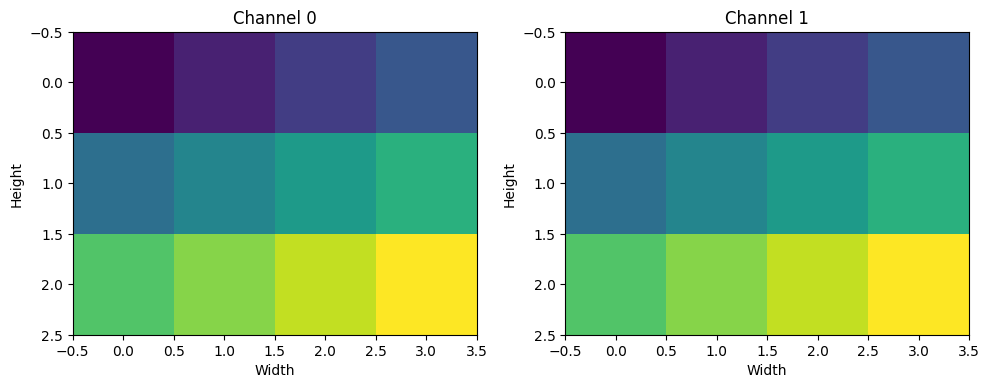

In [ ]:
# 시각화
import matplotlib.pyplot as plt
import numpy as np

tensor_np = A.numpy() # PyTorch 텐서를 NumPy 배열로 변환
fig, axs = plt.subplots(1, 2, figsize=(10, 5)) # 1행 2열의 서브플롯을 생성

for i in range(tensor_np.shape[0]):
    im = axs[i].imshow(tensor_np[i], cmap='viridis') # 각 채널을 이미지로 표시
    axs[i].set_title(f'Channel {i}')
    axs[i].set_xlabel('Width')
    axs[i].set_ylabel('Height')

plt.tight_layout()
plt.show()

Q. torch.Size([2, 3, 4]) 의 의미는?

A. torch.Size([2, 3, 4])는 PyTorch 텐서의 형태(shape)를 나타내며, 3차원 텐서의 각 차원의 크기를 의미하며,

각 차원에 대한 해석은 다음과 같이 할 수 있습니다.

- 첫 번째 차원 (2): 텐서의 깊이 또는 채널 수를 나타냅니다.
    - (예: 2개의 이미지 또는 2개의 특징 맵)

- 두 번째 차원 (3): 각 채널의 행 수를 나타냅니다.
    - 예: 각 이미지나 특징 맵의 높이

- 세 번째 차원 (4): 각 행의 열 수를 나타냅니다.
    - 예: 각 이미지나 특징 맵의 너비

- 실제 예시:

    - 이미지 처리: 2개의 흑백 이미지, 각각 3x4 픽셀
    - 자연어 처리: 2개의 문장, 각 문장은 3개의 단어, 각 단어는 4차원 임베딩 벡터